# Simple image denoising example using 2-dimensional FFT

**Illustrates**: 2-d image denoising, use of the numpy FFT library, array
manipulations, image plotting.

Let's try to denoise the following image with naive numpy manipulations:

<center>
<img src="files/hw_0_data/moonlanding.png" width=30%/>
</center>

The convolution of an input with with a linear filter in the termporal or
spatial domain is equivalent to multiplication by the Fourier transforms of the
input and the filter in the spectral domain.  This provides a conceptually
simple way to think about filtering: transform your signal into the frequency
domain, dampen the frequencies you are not interested in by multiplying the
frequency spectrum by the desired weights, and then apply the inverse transform
to the modified spectrum, back into the original domain.  In the example below,
we will simply set the weights of the frequencies we are uninterested in (the
high frequency noise) to zero rather than dampening them with a smoothly
varying function.  Although this is not usually the best thing to do, since
sharp edges in one domain usually introduce artifacts in another (eg high
frequency "ringing"), it is easy to do and sometimes provides satisfactory
results.

<center>
<img src="files/hw_0_data/moon_denoise.png" width=60%/>
</center>

High frequency noise filtering of a 2D image in the Fourier domain.
The upper panels show the original image (left) and spectral power
(right) and the lower panels show the same data with the high
frequency power set to zero.  Although the input and output images are
grayscale, you can provide colormaps to `imshow` to plot them in
pseudo-color, with the `cmap` argument to `imshow`, which accepts any
of the colormaps found in the `matplotlib.cm` module.

## Exercise

After reading the image file `moonlanding.png` from the data
directory, try to produce images like the ones in the figure.  We will
describe the process here and provide some hints as to what you need
to think about.
   
The image in the upper left panel of the Figure is a grayscale photo
of the moon landing.  There is a banded pattern of high frequency
noise polluting the image.  In the upper right panel we see the 2D
spatial frequency spectrum.  The FFT output in the `numpy.fft` module
is packed with the lower freqeuencies starting in the upper left, and
proceeding to higher frequencies as one moves to the center of the
spectrum (this is the most efficient way numerically to fill the
output of the FFT algorithm).  Because the input signal is real, the
output spectrum is complex and symmetrical: the transformation values
beyond the midpoint of the frequency spectrum (the Nyquist frequency)
correspond to the values for negative frequencies and are simply the
mirror image of the positive frequencies below the Nyquist (this is
true for the 1D, 2D and ND FFTs in `numpy`).

You should compute the 2D spatial frequency spectra of the luminance
image, zero out the high frequency components, and inverse transform
back into the spatial domain.  You can plot the input and output
images with `plt.imshow`, but you should observe that if you show the
power spectrum (the absolute value of the FFT) directly, you will only
see white, and not the image in the Figure's upper right panel.  This
is due to the fact that the power spectrum has a small number of
pixels with extremely high amplitude, which completely swamp the
contrast (you can verify this by playing with a histogram of the
data).

In [3]:
%pylab inline

import sys
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Here's a handy utility for you that normalizes the peaks in the
spectrum so the huge dynamic range in this image doesn't swamp the
plot. You can take this as a given.

In [5]:
def plot_spectrum(F, amplify=1000, ax=None):
    """Normalise, amplify and plot an amplitude spectrum."""

    # Note: the problem here is that we have a spectrum whose histogram is
    # *very* sharply peaked at small values.  To get a meaningful display, a
    # simple strategy to improve the display quality consists of simply
    # amplifying the values in the array and then clipping.

    # Compute the magnitude of the input F (call it mag).  Then, rescale mag by
    # amplify/maximum_of_mag.
    mag = abs(F) 
    mag *= amplify/mag.max() 
    
    # Next, clip all values larger than one to one.
    mag[mag > 1] = 1 

    if ax is None: ax = plt.gca()
    ax.imshow(mag, plt.cm.Blues)

In [8]:
!ls hw_0_data

README           im1-b.png        moon_denoise.png voice.wav
im1-a.png        im2-1.png        moonlanding.png


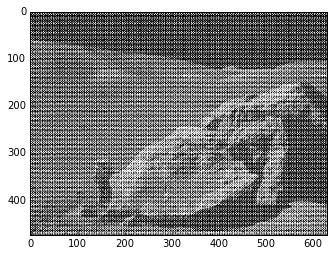

In [9]:
fname = 'hw_0_data/moonlanding.png'
# your code here, you should get this image shape when done:
# Image shape: (474, 630)
img = plt.imread(fname)
plt.imshow(img, cmap='gray')

Compute the 2d FFT of the input image, look at the center of the
spectrum, and simply truncate everything but the corners to zero.

**Hints:** 

* Look for a 2-d FFT in `np.fft`.

* Call this variable 'F', which is the name we'll be using below.

* In the lines following, we'll make a copy of the original spectrum
  and truncate coefficients.

* In the lines following, we'll make a copy of the original spectrum
  and truncate coefficients.

* In Python, a complex number `z` has `z.real` and `z.imag` attributes
  for its real and imaginary parts.

In [14]:
# Assign the 2d FFT to `F`
F = np.fft.fft2(img)
shape(F)
F 

array([[ 126598.45631307   +0.j        ,   -4608.57948773-1892.46877531j,
           -322.09297648  -20.27743947j, ...,
           -906.15851028+1539.30807687j,    -322.09297648  +20.27743947j,
          -4608.57948773+1892.46877531j],
       [  -9421.09976601+5242.11345685j,    5224.01627226-3171.7433364j ,
           1607.99264281+1269.42428736j, ...,
           -677.34506193 -936.16174892j,     354.62469250-1003.83477597j,
           1965.36600878-2188.05933403j],
       [  -2928.35134551+7280.91622038j,   -1116.40653721+1338.31789687j,
           -474.20056129 +385.4021588j , ...,
            239.77228866 -977.21290965j,    1582.92834328 -261.95346945j,
           2641.92695069 -292.09365855j],
       ..., 
       [   1850.57175023-2451.1786809j ,    -781.08067708  +13.74450084j,
            377.90706254  +12.66992953j, ...,
          -1526.78686972+1271.26210079j,   -2705.57182514-3488.5291608j ,
           1897.40406842-2281.90925245j],
       [  -2928.35134551-7280.91622038j,   

In [17]:
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1
ff = F.copy()
# Set r and c to be the number of rows and columns of the array.
r, c = ff.shape

In [28]:
# Set all entries between r*keep_fraction and r*(1-keep_fraction) to 0:
ff[int(r*keep_fraction):int(r*(1-keep_fraction)), :] = 0

In [29]:
# Set all entries between c*keep_fraction and c*(1-keep_fraction) to 0:
ff[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

In [30]:
print(ff[int(r*keep_fraction):int(r*(1-keep_fraction))])

[[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 ..., 
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]]


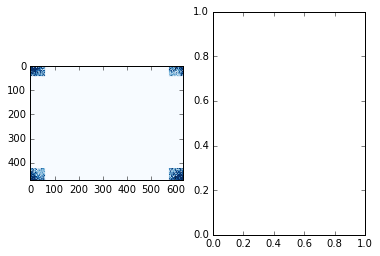

In [31]:
fig,(ax1, ax2) = plt.subplots(1, 2)
plot_spectrum(F, ax = ax1)
plot_spectrum(ff, ax = ax1)

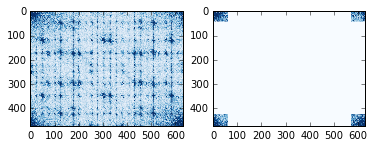

In [27]:
F = np.fft.fft2(img)
keep_fraction = 0.1
ff = F.copy()
r, c = ff.shape
ff[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
ff[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_spectrum(F, ax=ax1)
plot_spectrum(ff, ax=ax2)